# KU AI Workshop
## Learning Machine Learning - Gradient Descent
### By: Daniel Johnson

# Problem Description

### Given a set of parameters, minimize some function over these parameters.

# What is Gradient Descent?

### Nerd Definition: Gradient descent is a first-order iterative optimization algorithm for finding a local minimum of a differentiable function. 

### - Wikipedia

### **BUT HEAR ME OUT**

### A Simpler Definition: 

### Think of a function as a hill. Walk down the hill by taking the steepest step at any point.

### Why?

### There are applications over many fields for optimization.
![applications](imgs/Applications.png)

### Today, I will be focusing Gradient Descent in terms of machine learning. 


### In machine learning, Gradient Descent is used in Linear/Logistic Regression, (Linear) Support Vector Machines, Neural Networks, etc. All of these algorithms have parameters that need to be optimized.

# ML Recap

### Remember, supervised learning is all about learning from labeled data.

That is, we have a dataset consisting of feature vectors ($x$) and outputs ($y$),
$$ x = \left[ \begin{array}{ccc} x_1 & x_2 & x_3 & ... & x_n \end{array}\right],\ \ y $$


For this example, I created an artificial dataset where
$$ y = 3x + 5 + rand(-3, 3)\ for\ 100\ xs\ in\ [0,10)  $$

So, we may have a data point at $x = 5,\ y = 3(5) + 5 + 0.5 = 20.5$

In [1]:
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
from IPython.display import Image, display
jtplot.style(theme='onedork')
import numpy as np

m, b = 3, 5
POINTS = 100

xs = np.linspace(0, 10, POINTS)
ys = m * xs + b + (np.random.randn(POINTS) * 3)

plt.scatter(xs, ys)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Artificial Dataset')
plt.savefig('imgs/random_data.png', dpi=200);
plt.close()

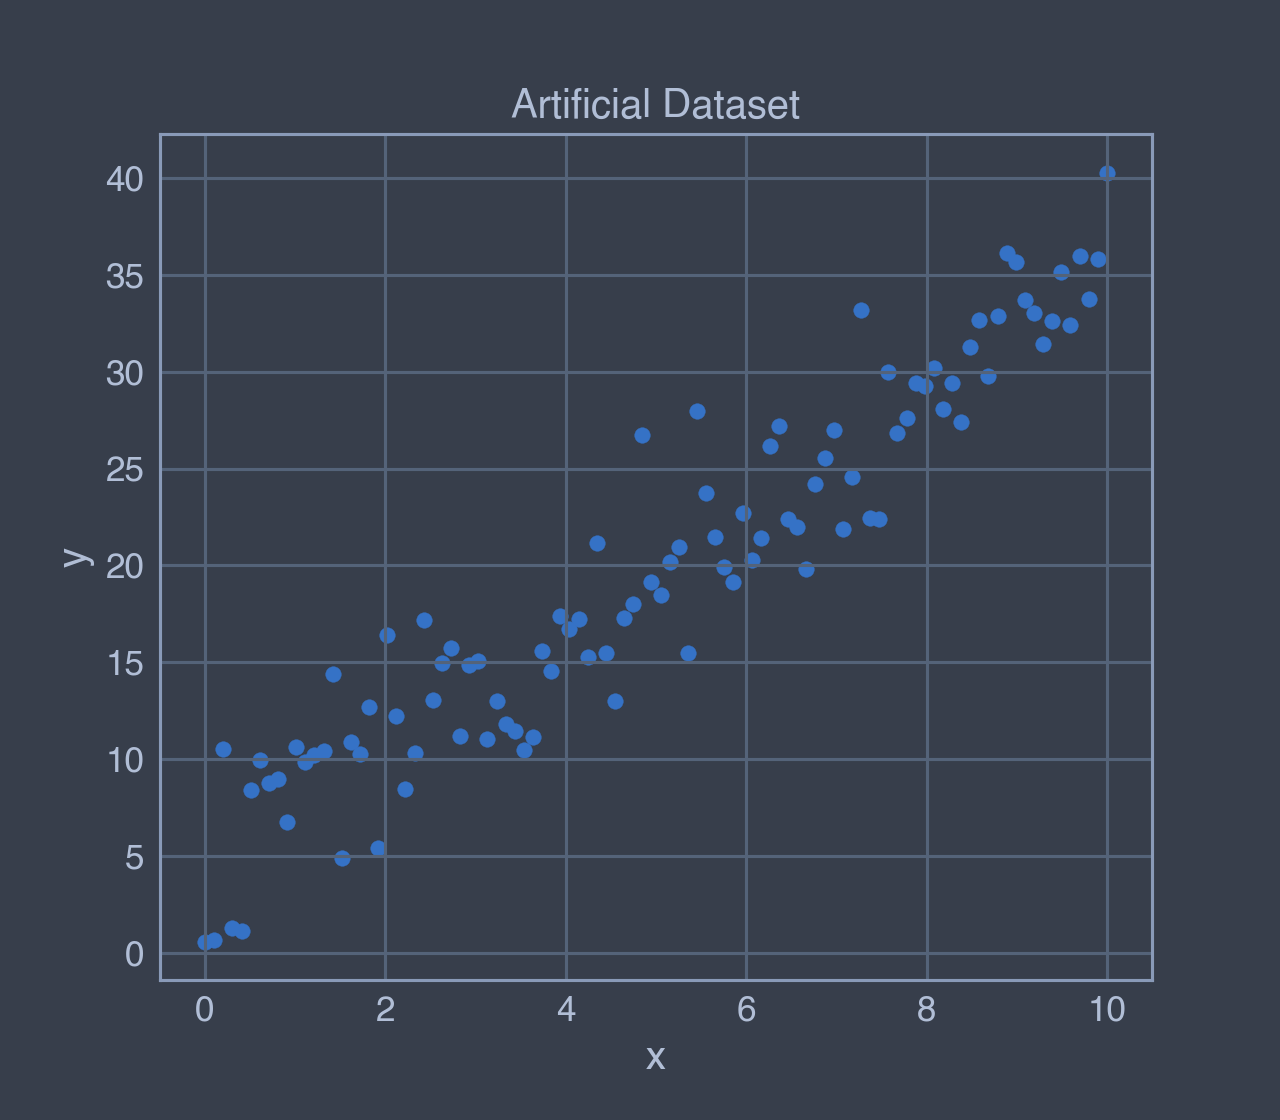

In [2]:
# show the dataset
display(Image(filename='imgs/random_data.png', retina=True))

# Application: Linear Regression

We will be implementing gradient descent in the simple case of **linear regression**.

The idea of linear regression is that we want to form a "best fit" line to our data, good old $ y = mx + b $.

So, the goal is to find the best $m$ and $b$. We will generalize these parameters to
$$ \theta = [\theta _0\ \theta _1] $$

Using this $\theta$, we can make predictions by simply feeding an input $x$ into
$$ prediction(x) = \theta _0 x + \theta _1 $$

This begs the question, what makes a *bad* $\theta$?

 We use a **cost function**, sometimes represented as $J(\theta)$.


There are many cost functions out there, some of which you can find at [this tensorflow docs page](https://www.tensorflow.org/api_docs/python/tf/keras/losses). We will use Mean Squared Error (MSE), which is very fit for regression.

$$ J(\theta) = \frac{1}{n}\sum_{i=1}^{n}(y_{real} - y_{predicted})^2 $$

So, our formal goal is $$argmin_{\theta}(J(\theta))$$

We have to start somewhere, so let's initialize theta to 
$$[ rand(-1, 1), rand(-1, 1) ]$$

This is somewhat arbitrary, but randomness helps finding better local minima over many runs.

Let's see how we've done before training.

In [3]:
theta = np.random.randn(2)
print(theta)

plt.scatter(xs, ys)
plt.plot(xs, theta[0] * xs + theta[1], c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Initial Model')
plt.savefig('imgs/initial_model.png', dpi=200);
plt.close()

[-1.33528764  0.16031163]


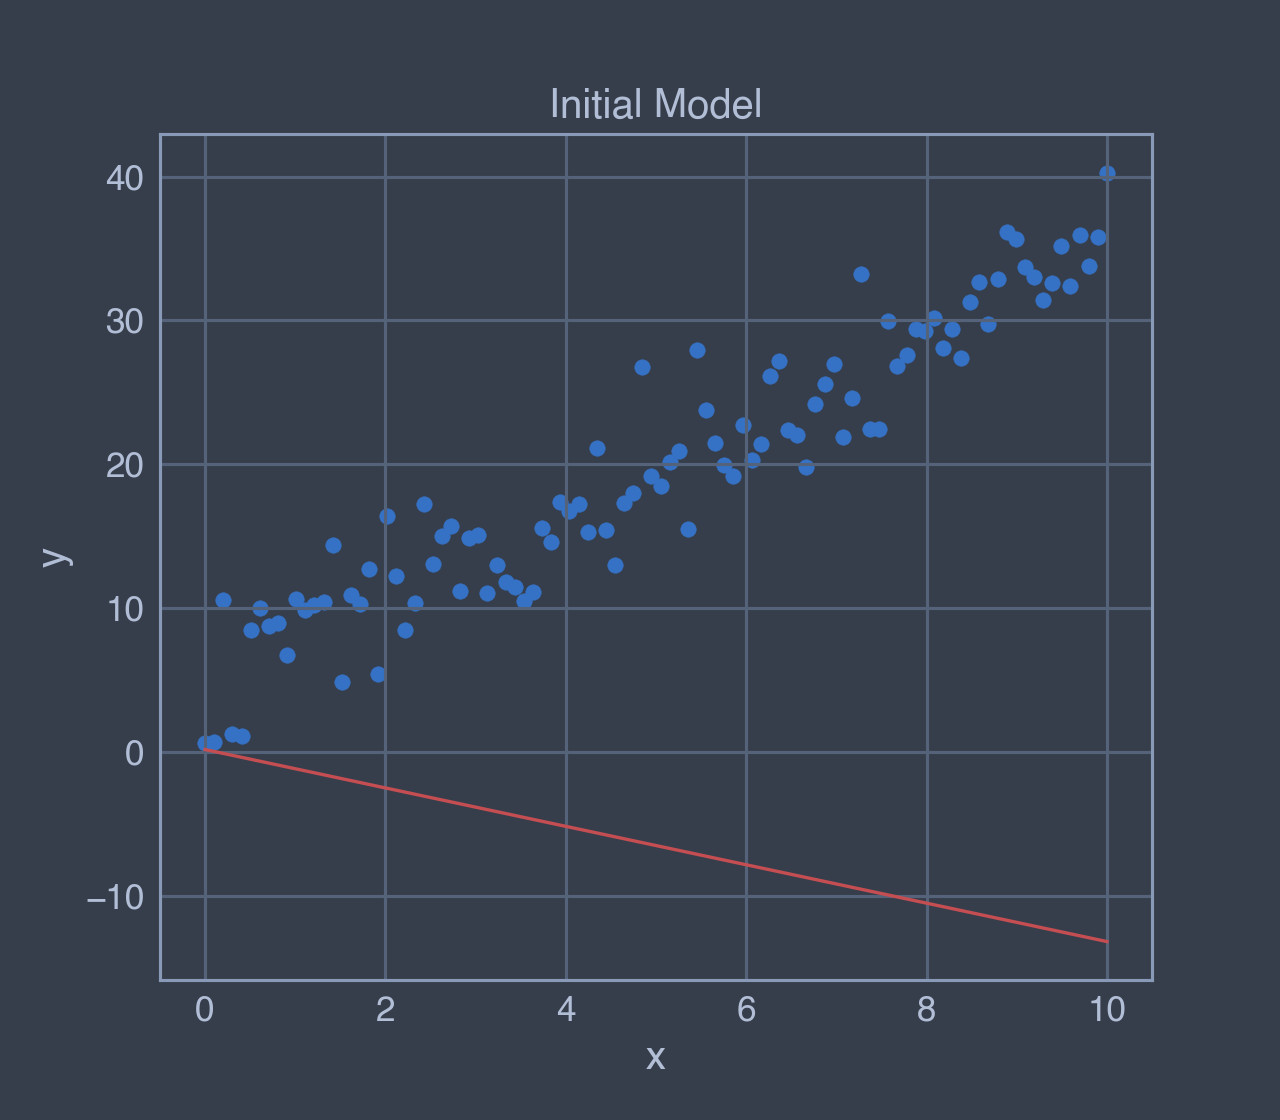

In [4]:
display(Image(filename='imgs/initial_model.png', retina=True))

Untrained $\theta$ doesn't work very well, so how to we minimize $J(\theta)$?

# Gradient Descent (Math Cheat Code)

Gradient Descent is like walking down a hill. You are at a point on a slope, and you go down. Very simple!

Using this, we can take "steps" down our cost function. How do you know which way is downhill? ***Calculus***

If we take the derivative of our cost function with respect to $\theta$, we can take a "step" in the downwards direction. I won't bore you with the derivation, in fact I have something that will do it for us! Do this many times, and you got Gradient Descent.

![Gradient Descent Gif](imgs/gd_analyticsvidhya.gif) 

credit: [Analytics Vidhya](https://www.analyticsvidhya.com/blog/2021/07/understanding-the-what-and-why-of-gradient-descent/)

But what is this "step"? 

We want to adjust $\theta$ by some factor of the slope at your given point. We call this factor the "learning rate", which can be denoted as $\alpha$. 

So, we update $\theta$ every iteration like so:

$$ \theta = \theta - \alpha * \frac{\partial J}{\partial \theta} $$

The learning rate is a parameter that can be manually fine tuned, these are called *hyperparameters*. Common values are $0.00001 \le \alpha \le 0.5$. Too small of $\alpha$ might take too long to converge, too large of $\alpha$ might actually diverge.

# Code Time :)

In [5]:
# math is hard, good code is easy :)
# jax allows for easy differentiation
import jax.numpy as jnp
from jax import grad

def mse(ys_true: list[float], ys_pred: list[float]) -> float:
    return jnp.mean(((ys_true - ys_pred) ** 2))

mse_grad = grad(mse)

/opt/homebrew/Caskroom/miniforge/base/envs/ml/lib/python3.9/site-packages/jax/_src/lib/__init__.py:32: UserWarning: JAX on Mac ARM machines is experimental and minimally tested. Please see https://github.com/google/jax/issues/5501 in the event of problems.
  warnings.warn("JAX on Mac ARM machines is experimental and minimally tested. "


Our cost function will not look like the previous example, why?

J($\theta$) is a function that takes len($\theta$) = 2 inputs and gives one scaler output. 3D!

### Let's see it!

In [6]:
# plot the cost function for each theta
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-50, 50, 1000) # theta0
y = np.linspace(-50, 50, 1000) # theta1
theta_0s, theta_1s = np.meshgrid(x, y) # create a grid of points
costs = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        costs[i, j] = mse(ys, (theta_0s[i, j] * xs + theta_1s[i, j]))

ax.plot_surface(theta_0s, theta_1s, costs, cmap='plasma', edgecolor='none')
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost', labelpad=20)
ax.set_title('Cost Function over Theta')
plt.savefig('imgs/cost_function.png', dpi=200);
plt.clf()
plt.close()

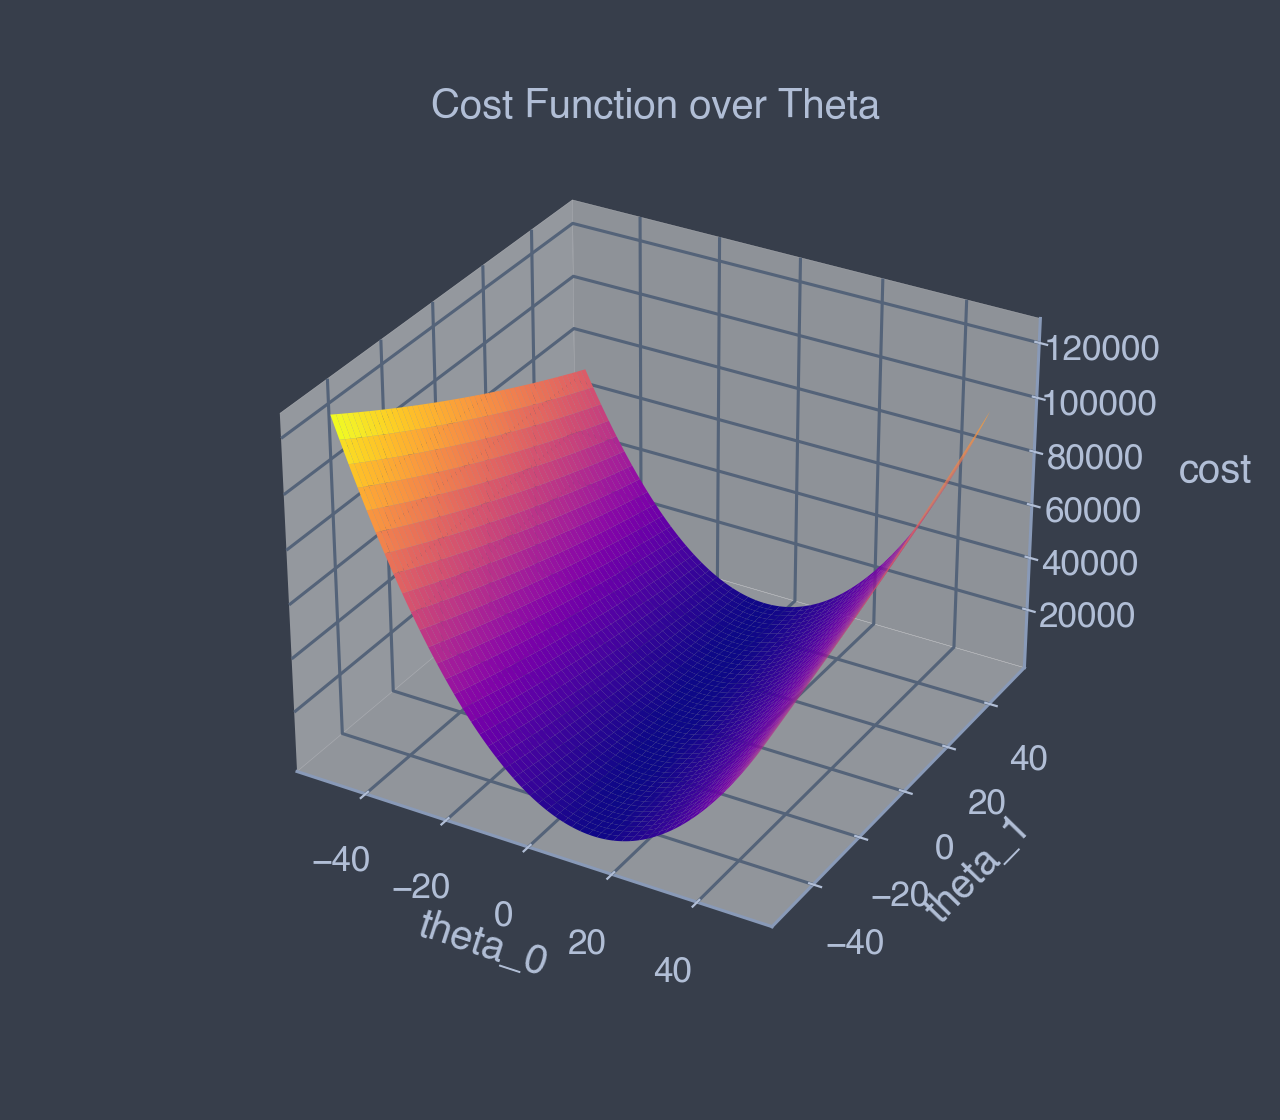

In [7]:
display(Image(filename='imgs/cost_function.png', retina=True))

# Let's Train!

In [8]:
# it is best practice to split your data into training and testing data
# this is because we want our model to generalize well to new data
# this way, we can use a training set to train our model, 
#   and then evaluate the model on a test set
from sklearn.model_selection import train_test_split

MAX_ITER = 100
LEARNING_RATE = 0.01 # alpha

X_train, X_test, y_train, y_test = train_test_split(xs, ys, test_size=0.5, random_state=42)

cost_history_train = []
cost_history_test = []
theta_history = [theta]
for i in range(1, MAX_ITER + 1):
    y_pred_train = theta[0] * X_train + theta[1]
    mse_train = mse(y_train, y_pred_train)
    cost_history_train.append(mse_train)

    grad_mse_wrt_theta = -sum(mse_grad(y_train, y_pred_train))
    theta = theta - LEARNING_RATE * grad_mse_wrt_theta
    theta_history.append(theta)

    y_pred_test = theta[0] * X_test + theta[1]
    mse_test = mse(y_test, y_pred_test)
    cost_history_test.append(mse_test)
    
    print(f'Iteration {i}: MSE train = {mse_train:.3f}, test = {mse_test:.3f}')

Iteration 1: MSE train = 983.438, test = 559.894
Iteration 2: MSE train = 747.798, test = 422.219
Iteration 3: MSE train = 568.985, test = 318.337
Iteration 4: MSE train = 433.313, test = 240.034
Iteration 5: MSE train = 330.391, test = 181.081
Iteration 6: MSE train = 252.326, test = 136.759
Iteration 7: MSE train = 193.128, test = 103.491
Iteration 8: MSE train = 148.248, test = 78.569
Iteration 9: MSE train = 114.232, test = 59.940
Iteration 10: MSE train = 88.458, test = 46.053
Iteration 11: MSE train = 68.937, test = 35.734
Iteration 12: MSE train = 54.158, test = 28.096
Iteration 13: MSE train = 42.974, test = 22.468
Iteration 14: MSE train = 34.516, test = 18.345
Iteration 15: MSE train = 28.123, test = 15.345
Iteration 16: MSE train = 23.295, test = 13.182
Iteration 17: MSE train = 19.652, test = 11.639
Iteration 18: MSE train = 16.906, test = 10.554
Iteration 19: MSE train = 14.839, test = 9.806
Iteration 20: MSE train = 13.285, test = 9.305
Iteration 21: MSE train = 12.118, t

In [9]:
plt.plot(cost_history_train)
plt.plot(cost_history_test)
plt.legend(['train', 'test'])
plt.title('Cost history')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.savefig('imgs/cost_history.png', dpi=200)
plt.close()

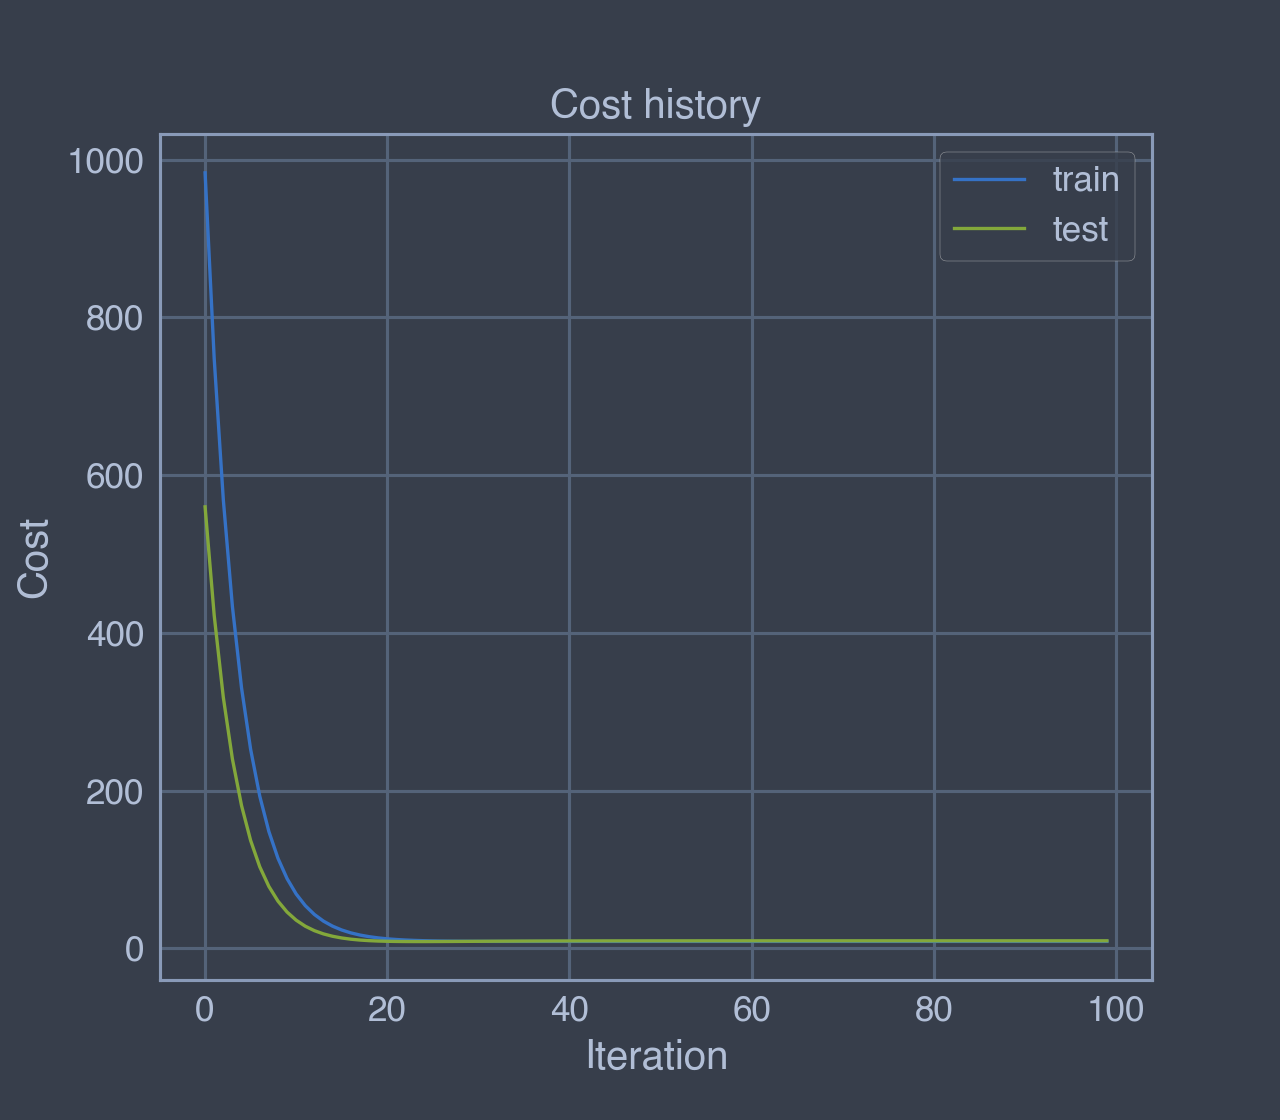

In [10]:
display(Image(filename='imgs/cost_history.png', retina=True))

In [11]:
# plot the cost function for each theta
fig = plt.figure()
ax = plt.axes(projection='3d')

x = np.linspace(-2, 5, 1000) # theta0
y = np.linspace(-2, 5, 1000) # theta1
theta_0s, theta_1s = np.meshgrid(x, y) # create a grid of points
costs = np.zeros((1000, 1000))
for i in range(1000):
    for j in range(1000):
        costs[i, j] = mse(y_train, (theta_0s[i, j] * X_train + theta_1s[i, j]))

for theta in theta_history:
    t0, t1 = theta
    ax.scatter(t0, t1, mse(y_train, t0 * X_train + t1), 'ro', alpha=1, zorder=10, s=10, c='white')

ax.plot_surface(theta_0s, theta_1s, costs, cmap='plasma', rstride=1, cstride=1)
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cost', labelpad=10)
ax.set_title('Descent of the Cost Function')

plt.savefig('imgs/cost_function_descent.png', dpi=200)
plt.clf()
plt.close()

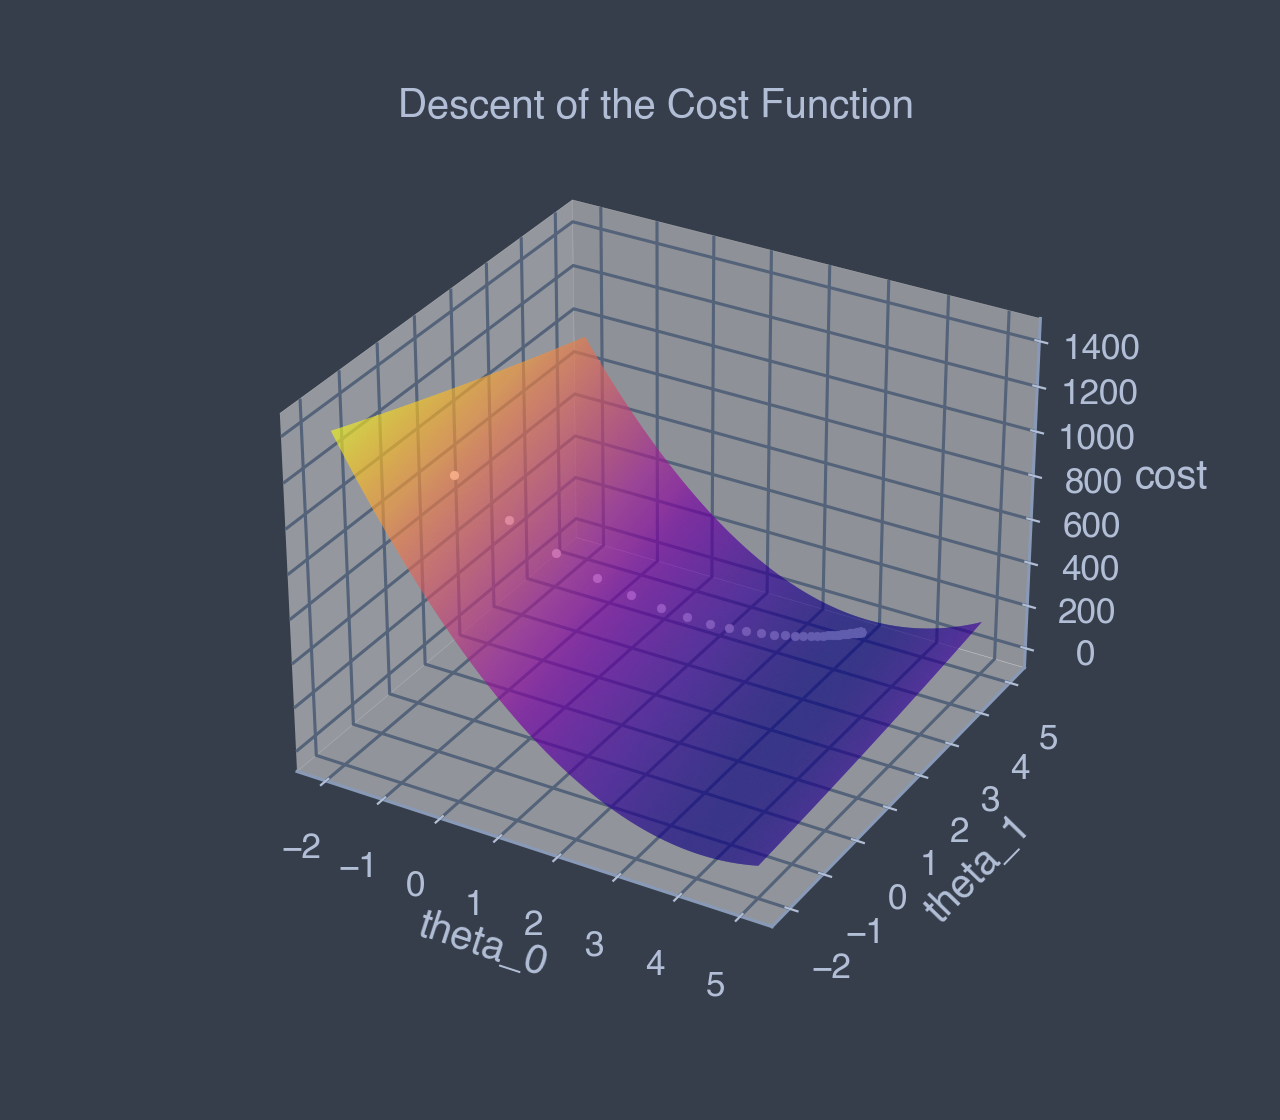

In [12]:
display(Image(filename='imgs/cost_function_descent.png', retina=True))

In [13]:
#%%capture output
from matplotlib.animation import FuncAnimation, PillowWriter

fig, ax = plt.subplots(dpi=200)

initial_theta = theta_history[0]
line, = ax.plot(xs, initial_theta[0] * xs + initial_theta[1], lw=2, c='r')
ax.scatter(xs, ys)
ax.title.set_text('Linear Regression Training')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_axisbelow(True)

def animate(i):
    current_theta = theta_history[i]
    line.set_ydata(current_theta[0] * xs + current_theta[1])
    for txt in ax.texts:
        txt.set_visible(False)
    props = dict(boxstyle='round', facecolor='#536177', alpha=1)
    txt = '\n'.join((
        f'Iteration {i}',
        f'\u03B8 = [ {current_theta[0]:.2f} {current_theta[1]:.2f} ]',
        f'J(\u03B8) = {cost_history_train[i-1]:.3f}',
    ))
    ax.text(0.09, 0.95, txt, transform=ax.transAxes, fontsize=14, verticalalignment='top', bbox=props)
    return line,

anim = FuncAnimation(fig, animate, frames=len(theta_history) - 1, interval=100)
anim.save('imgs/training_animation.gif', writer=PillowWriter(fps=20))
plt.close()

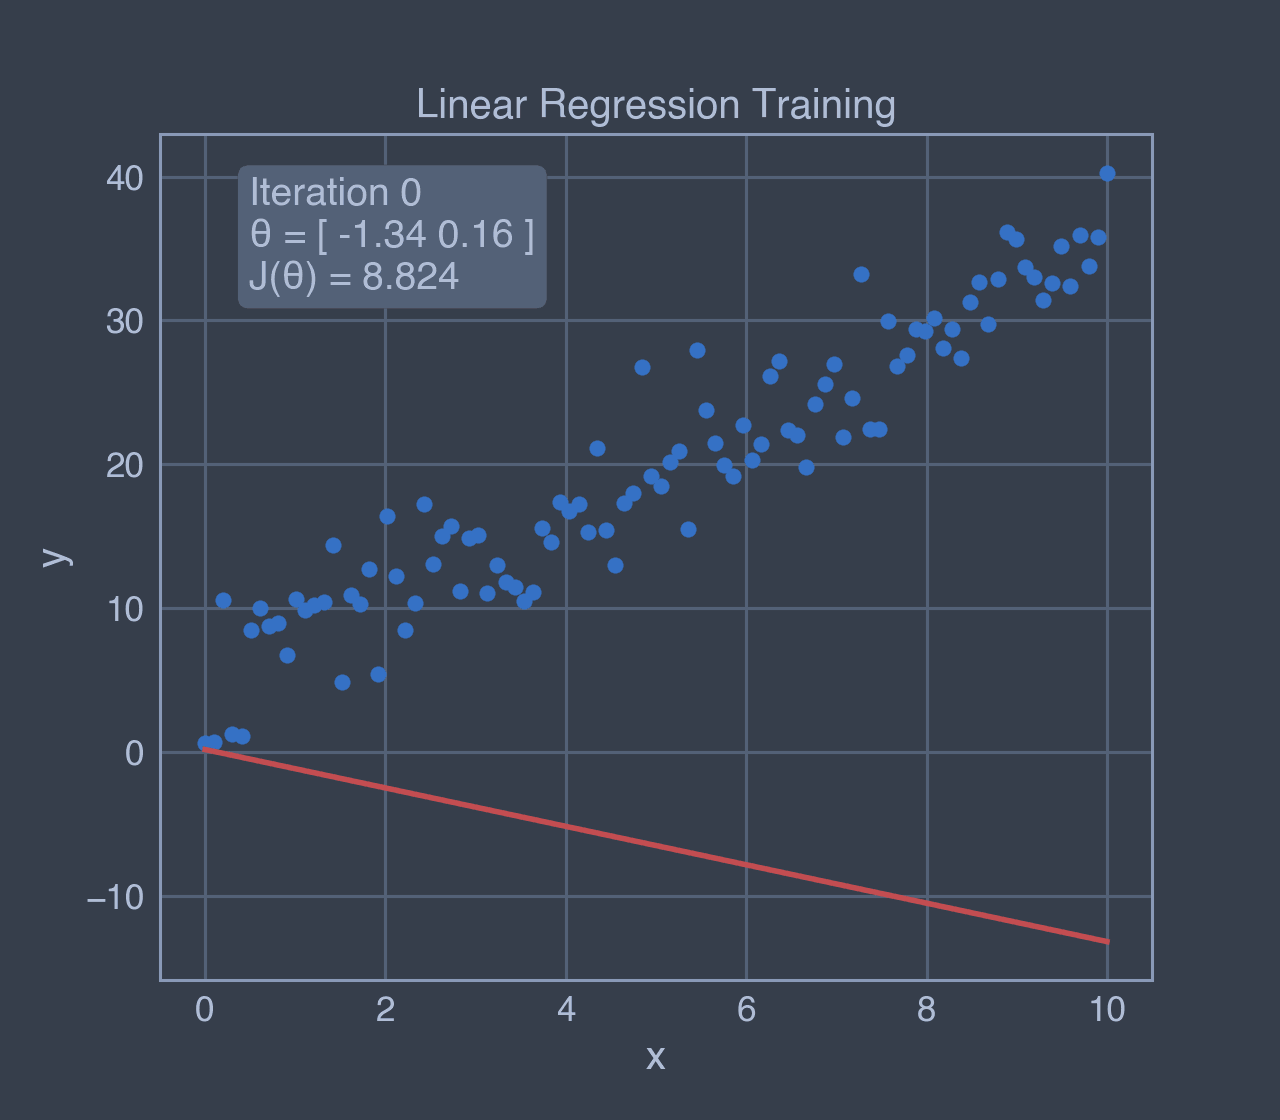

In [14]:
display(Image(filename='imgs/training_animation.gif', retina=True))

# Questions? 
## You can reach me at danielrjohnson00@ku.edu or through the KU AI Discord